### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

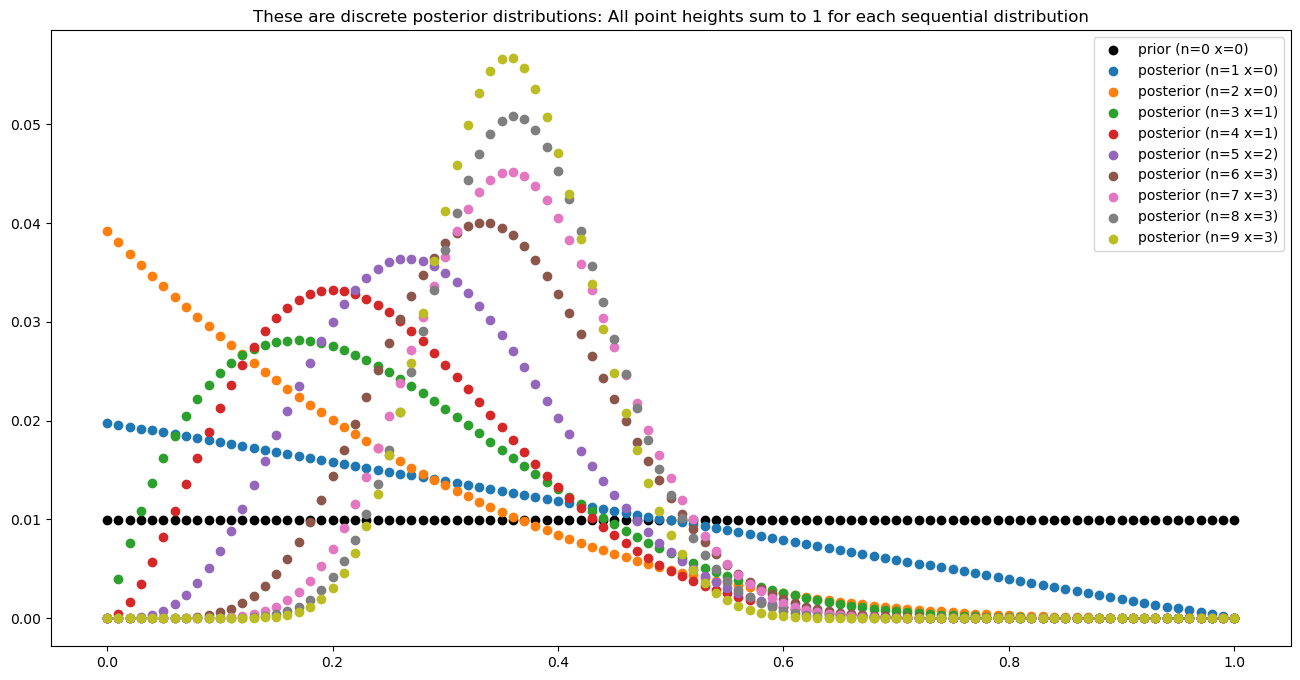

In [1]:
# Q1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    
    posterior = likelihood * prior
    posterior /= posterior.sum()
    
    prior = posterior
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")
    
    prior = posterior

plt.legend();

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

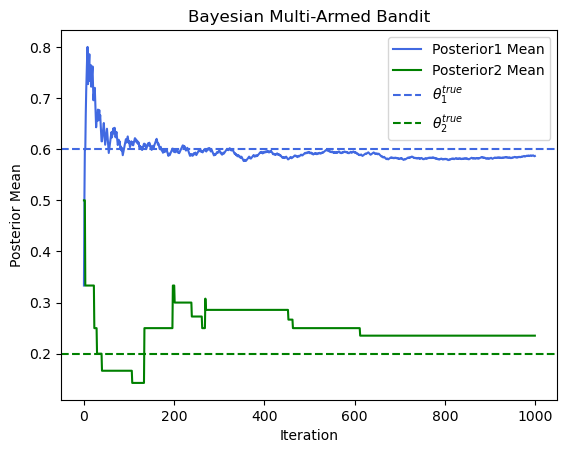

In [50]:
import numpy as np
import matplotlib.pyplot as plt

theta1_true = 0.6
theta2_true = 0.2

pos1_alpha, pos1_beta = 1, 1
pos2_alpha, pos2_beta = 1, 1

pos1_means = []
pos2_means = []

m = 1000
for t in range(m):
    
    sample1 = np.random.beta(pos1_alpha, pos1_beta)
    sample2 = np.random.beta(pos2_alpha, pos2_beta)
    
    if sample1 > sample2:
        result = np.random.rand() < theta1_true
        pos1_alpha += result
        pos1_beta += 1 - result
    else:
        result = np.random.rand() < theta2_true
        pos2_alpha += result
        pos2_beta += 1 - result
        
    pos1_mean = pos1_alpha / (pos1_alpha + pos1_beta)
    pos2_mean = pos2_alpha / (pos2_alpha + pos2_beta)
    pos1_means.append(pos1_mean)
    pos2_means.append(pos2_mean)

plt.plot(pos1_means, label="Posterior1 Mean", color="royalblue")
plt.plot(pos2_means, label="Posterior2 Mean", color="green")
plt.axhline(theta1_true, color='royalblue', linestyle='--', label=r"$\theta_1^{true}$")
plt.axhline(theta2_true, color='green', linestyle='--', label=r"$\theta_2^{true}$")

plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Bayesian Multi-Armed Bandit")
plt.legend()
plt.show() 


### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

### Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above

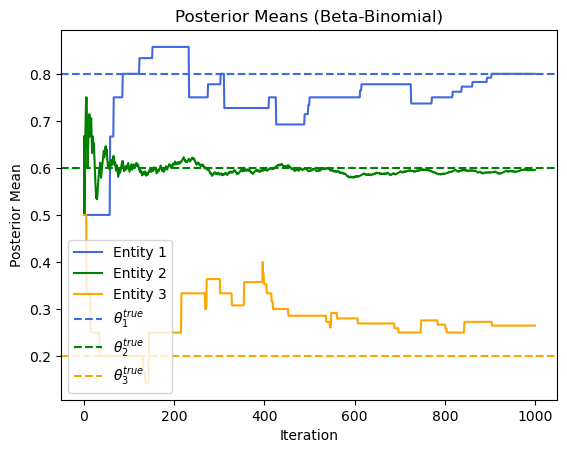

In [58]:
import numpy as np
import matplotlib.pyplot as plt

theta1_true = 0.8
theta2_true = 0.6
theta3_true = 0.2

pos1_alpha, pos1_beta = 1, 1
pos2_alpha, pos2_beta = 1, 1
pos3_alpha, pos3_beta = 1, 1

pos1_means = []
pos2_means = []
pos3_means = []

m = 1000

for t in range(m):
    sample1 = np.random.beta(pos1_alpha, pos1_beta)
    sample2 = np.random.beta(pos2_alpha, pos2_beta)
    sample3 = np.random.beta(pos3_alpha, pos3_beta)

    if sample1 > sample2 and sample1 > sample3:
        result = np.random.rand() < theta1_true
        pos1_alpha += result
        pos1_beta += 1 - result
    elif sample2 > sample1 and sample2 > sample3:
        result = np.random.rand() < theta2_true
        pos2_alpha += result
        pos2_beta += 1 - result
    else:
        result = np.random.rand() < theta3_true
        pos3_alpha += result
        pos3_beta += 1 - result
    
    # Update posterior means
    pos1_means.append(pos1_alpha / (pos1_alpha + pos1_beta))
    pos2_means.append(pos2_alpha / (pos2_alpha + pos2_beta))
    pos3_means.append(pos3_alpha / (pos3_alpha + pos3_beta))

# Plot the posterior means
plt.plot(pos1_means, label="Entity 1", color="royalblue")
plt.plot(pos2_means, label="Entity 2", color="green")
plt.plot(pos3_means, label="Entity 3", color="orange")
plt.axhline(theta1_true, color="royalblue", linestyle='--', label=r"$\theta_1^{true}$")
plt.axhline(theta2_true, color="green", linestyle='--', label=r"$\theta_2^{true}$")
plt.axhline(theta3_true, color="orange", linestyle='--', label=r"$\theta_3^{true}$")

plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Posterior Means (Beta-Binomial)")
plt.legend()
plt.show()


### Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

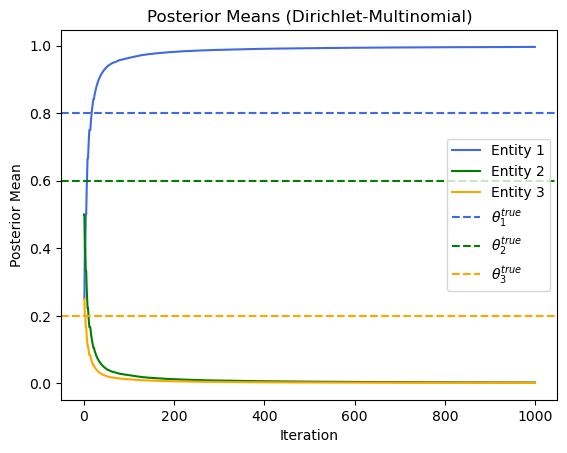

In [76]:
import numpy as np
import matplotlib.pyplot as plt

theta1_true = 0.8
theta2_true = 0.6
theta3_true = 0.2

prior1_alpha = 1
prior2_alpha = 1
prior3_alpha = 1

n1, x1 = 0, 0
n2, x2 = 0, 0
n3, x3 = 0, 0

pos1_means = []
pos2_means = []
pos3_means = []

m = 1000
for t in range(m):
    samples = np.random.dirichlet([prior1_alpha, prior2_alpha, prior3_alpha])
    
    if samples[0] > samples[1] and samples[0] > samples[2]:
        selected = 1
        result = np.random.rand() < theta1_true
        n1 += 1
        x1 += result
        prior1_alpha = x1 + 1
    elif samples[1] > samples[0] and samples[1] > samples[2]:
        selected = 2
        result = np.random.rand() < theta2_true
        n2 += 1
        x2 += result
        prior2_alpha = x2 + 1
    else:
        selected = 3
        result = np.random.rand() < theta3_true
        n3 += 1
        x3 += result
        prior3_alpha = x3 + 1
    
    total_alpha = prior1_alpha + prior2_alpha + prior3_alpha
    pos1_means.append(prior1_alpha / total_alpha)
    pos2_means.append(prior2_alpha / total_alpha)
    pos3_means.append(prior3_alpha / total_alpha)

plt.plot(pos1_means, label="Entity 1", color="royalblue")
plt.plot(pos2_means, label="Entity 2", color="green")
plt.plot(pos3_means, label="Entity 3", color="orange")
plt.axhline(theta1_true, color='royalblue', linestyle='--', label=r"$\theta_1^{true}$")
plt.axhline(theta2_true, color='green', linestyle='--', label=r"$\theta_2^{true}$")
plt.axhline(theta3_true, color='orange', linestyle='--', label=r"$\theta_3^{true}$")

plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Posterior Means (Dirichlet-Multinomial)")
plt.legend()
plt.show()


### Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting.

For cases with multiple entities, Analysis 2 (Dirichlet-Multinomial) is the better choice because it considers other entities and doesn't treat them as independent.

Example: multiple different advertisement posters online where success is if a viewer clicked on the advertisement. They could post/try all advertisements. When there is an advertisement that gets higher click rates, they would post that advertisement more. This would improve marketing and outreach. 